In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import joblib
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Load and preprocess the dataset
data = pd.read_csv("indian_liver_patient.csv")

In [4]:
# Fill missing values and map categorical data to numeric
data = data.fillna(method="ffill")
data['Gender'] = data['Gender'].map({"Female": 1, "Male": 0})
data["Dataset"] = data["Dataset"].map({1: 0, 2: 1})

In [5]:
# Verify dataset shape and columns
print("Data shape:", data.shape)
print("Data columns:", data.columns)

Data shape: (583, 11)
Data columns: Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


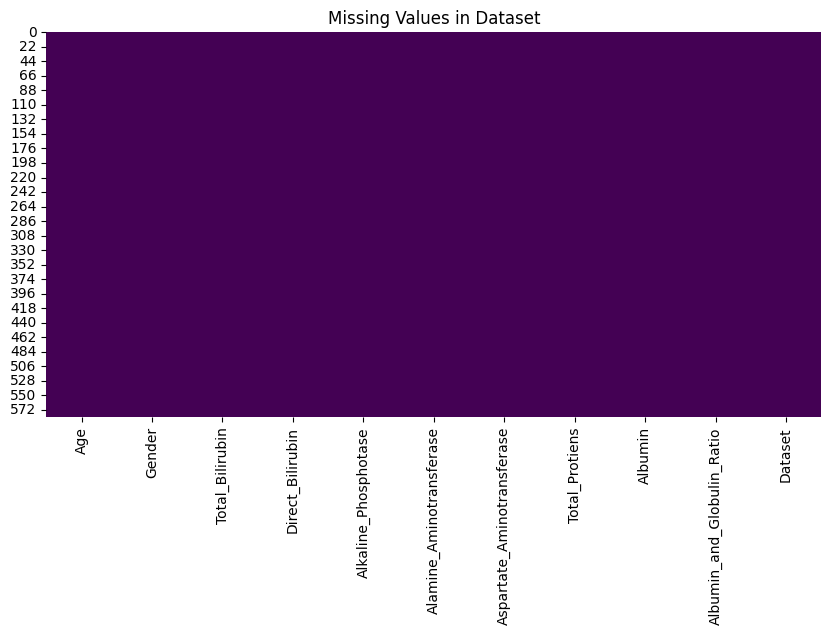

In [6]:
# Visualize missing data
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

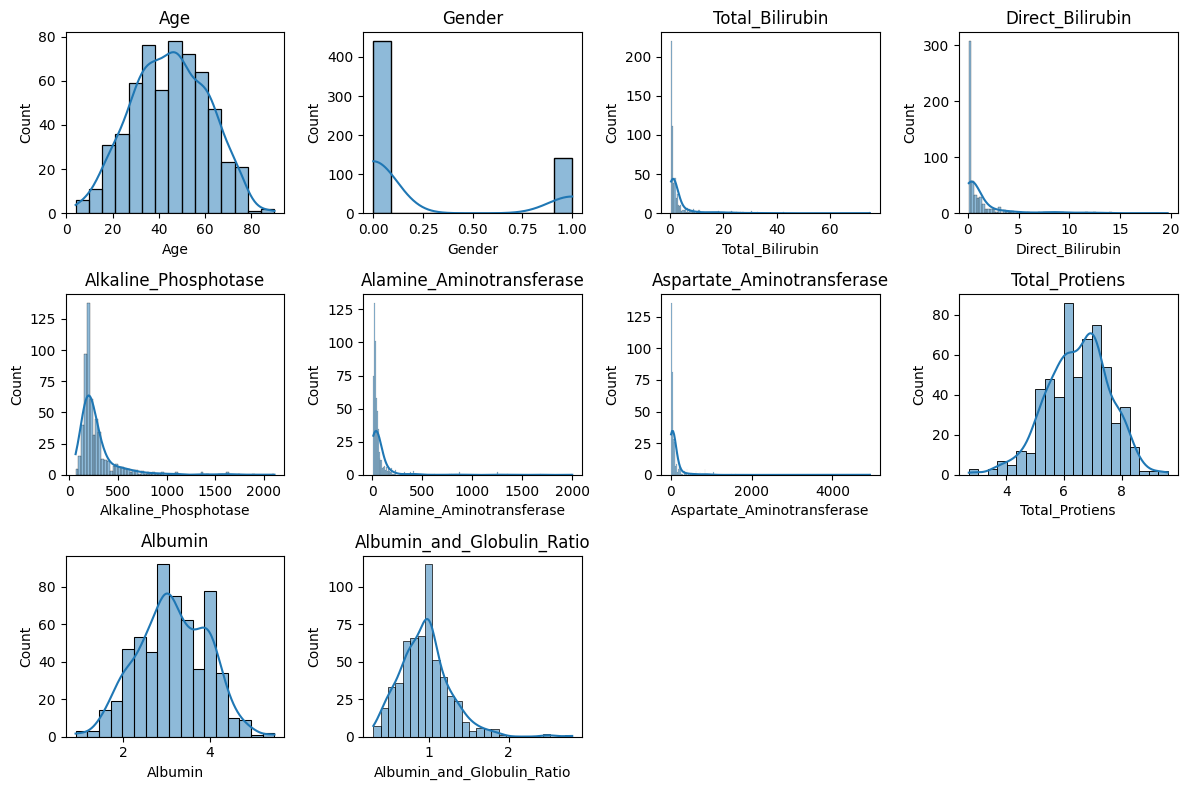

In [7]:
# Feature Distribution Plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

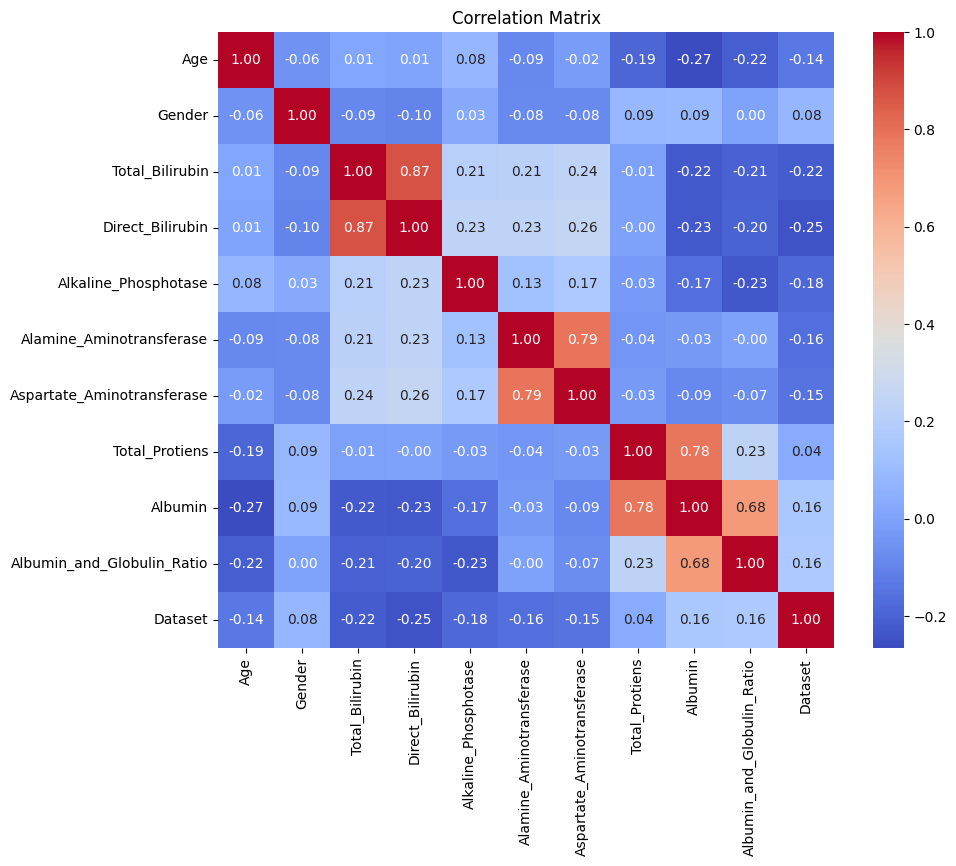

In [8]:
# Correlation Matrix Plot
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Separate features and target
target = data["Dataset"]
source = data.drop(columns=["Dataset"])

In [10]:
# Apply Standard Scaling
sc = StandardScaler()
source_scaled = sc.fit_transform(source)

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(source_scaled, target, test_size=0.01, random_state=42)

In [14]:
# Apply SMOTE to balance the training dataset
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [15]:
# Initialize and train Logistic Regression model with cross-validation
lr = LogisticRegression()
cv_results = cross_validate(lr, X_train_res, y_train_res, cv=10, return_train_score=True)

In [16]:
# Cross-validation with 10 folds
cv_results = cross_validate(lr, source, target, cv=10, return_train_score=True)
print("Cross-validation results:", cv_results)

Cross-validation results: {'fit_time': array([0.01750851, 0.00809932, 0.00603151, 0.00699711, 0.00605679,
       0.00596189, 0.0070219 , 0.00738621, 0.00596619, 0.00719857]), 'score_time': array([0.00201678, 0.00096416, 0.00096679, 0.0010016 , 0.0009799 ,
       0.00099826, 0.00097561, 0.00104308, 0.00105572, 0.00100136]), 'test_score': array([0.69491525, 0.6779661 , 0.71186441, 0.75862069, 0.70689655,
       0.70689655, 0.70689655, 0.68965517, 0.70689655, 0.75862069]), 'train_score': array([0.71755725, 0.71946565, 0.71946565, 0.71809524, 0.71619048,
       0.71428571, 0.72      , 0.71619048, 0.72      , 0.71238095])}


C:\Users\Parth\anaconda_new\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Parth\anaconda_new\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [17]:
print("Average Training Score:", np.mean(cv_results['train_score']))
print("Average Test Score:", np.mean(cv_results['test_score']))

Average Training Score: 0.7173631406761177
Average Test Score: 0.7119228521332555


In [18]:
# Save the trained model
joblib.dump(lr, "indian_liver_patient.pkl")
# Output summary of cross-validation
"Model saved as 'model4.pkl'."

"Model saved as 'model4.pkl'."